# World Happiness Report 2021


It has been over ten years since the first World Happiness Report was published. And it is exactly ten years since the United Nations General Assembly adopted Resolution 66/281, proclaiming 20 March to be observed annually as International Day of Happiness. Since then, more and more people have come to believe that our success as countries should be judged by the happiness of our people. There is also a growing consensus about how happiness should be measured. This consensus means that national happiness can now become an operational objective for governments.

The rankings of national happiness are based on a Cantril ladder survey undertaken world-wide by the polling company Gallup, Inc. Nationally representative samples of respondents are asked to think of a ladder, with the best possible life for them being a 10, and the worst possible life being a 0. They are then asked to rate their own current lives on that 0 to 10 scale. The report correlates the life evaluation results with various life factors.

This project will look at the national happiness scores in all countries, the former Soviet Union countries and Kazakhstan.

<h4>Data sources:</h4>

<u>GDP:</u> Gross Domestic Product data is sourced from the World Bank's World Development Indicators.

<u>Social Support:</u> This data is collected by the Gallup World Poll, which surveys people in more than 160 countries about their social support networks.

<u>Healthy Life Expectancy:</u> This data is also collected by the Gallup World Poll.

<u>Freedom:</u> The Freedom House organization provides data on political freedom and civil liberties in countries around the world.

<u>Generosity:</u> This data is collected by the Gallup World Poll, which asks respondents about their charitable giving and volunteering.

<u>Absence of Corruption:</u> This data is provided by a number of sources, including the World Bank's Worldwide Governance Indicators, Transparency International's Corruption Perceptions Index, and the Varieties of Democracy project.

<h3>Project Goal</h3>
    
This project will predict the <u>happiness score</u> based on other information from the 2021 Happiness Report. This
information includes economic (GDP), social (social support, freedom to make choices, genrosity), health (healthy life expectancy) and political indicators such as perception of corruption. 

This project will look at the <u>25% of countries with the highest happiness score</u> and see what factors are predicting happiness. The project will also look at the <u>CIS countries</u> and their happiness scores and the determinants of happiness. 

This analysis will look at social support, GDP, life expectancy, freedom, generosity and perception of corruption and how these contribute to people's feeling of happiness. 

<u>Risks or limitations:</u> Happiness is a new indicator that is not in the agenda of many countries. There may be personall biases of how people understand happiness, freedom to make choices, generocity and corruption levels.  

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [3]:
happiness=pd.read_csv('../final_project_EDA/World Happiness report 2021.csv')

In [4]:
happiness.head()

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.0,0.949,-0.098,0.186
1,Denmark,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.7,0.946,0.030,0.179
2,Switzerland,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.4,0.919,0.025,0.292
3,Iceland,Western Europe,7.554,0.059,7.670,7.438,10.878,0.983,73.0,0.955,0.160,0.673
4,Netherlands,Western Europe,7.464,0.027,7.518,7.410,10.932,0.942,72.4,0.913,0.175,0.338


In [5]:
happiness.shape

(149, 12)

In [6]:
happiness.dtypes

Country name                       object
Regional indicator                 object
Ladder score                      float64
Standard error of ladder score    float64
upperwhisker                      float64
lowerwhisker                      float64
Logged GDP per capita             float64
Social support                    float64
Healthy life expectancy           float64
Freedom to make life choices      float64
Generosity                        float64
Perceptions of corruption         float64
dtype: object

Deletings some of the variables that will not be used in this analysis.  

In [7]:
happiness.drop(['Standard error of ladder score', 'upperwhisker', 'lowerwhisker'], inplace=True, axis=1)

Renaming columns.

In [8]:
happiness.columns = ['country', 'region', 'score', 'GDP', 'social_support', 'life_expectancy', 'freedom', 'generosity', 'corruption']

In [9]:
happiness.head()

,country,region,score,GDP,social_support,life_expectancy,freedom,generosity,corruption
0,Finland,Western Europe,7.842,10.775,0.954,72.0,0.949,-0.098,0.186
1,Denmark,Western Europe,7.620,10.933,0.954,72.7,0.946,0.030,0.179
2,Switzerland,Western Europe,7.571,11.117,0.942,74.4,0.919,0.025,0.292
3,Iceland,Western Europe,7.554,10.878,0.983,73.0,0.955,0.160,0.673
4,Netherlands,Western Europe,7.464,10.932,0.942,72.4,0.913,0.175,0.338


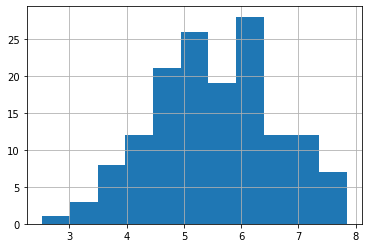

In [10]:
happiness.score.hist(bins='auto');

Majority of countries' scores are between 4.5 and 6.4 points. The lowest scores go down to 2.3.The histogram is left-skewed.

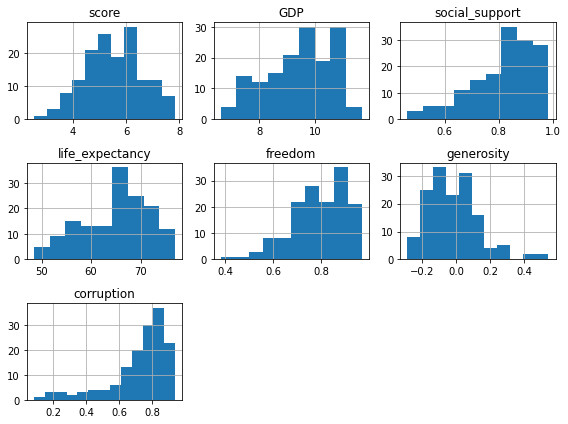

In [11]:
axes = happiness.hist(bins='auto', figsize = (8, 6))
axes[0, 0].get_figure().tight_layout();

Almost all histogram graphs are left-skewed, except generosity. The corruption histogram is left-skewed too which shows that there are many countries with low corruption levels. 

<h3>Groupping the happiness score by region<h3>

In [12]:
hr_by_region=happiness.groupby('region').agg({'score': 'mean'}).sort_values('score')

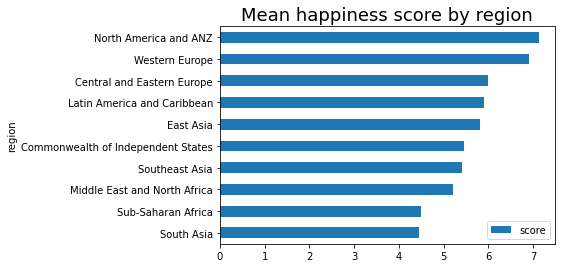

In [13]:
ax=hr_by_region.plot.barh()
ax.set_title("Mean happiness score by region", fontsize=18);

The mean happiness scores by regions show that North America, Australia and New Zealand region has the highest mean happiness score and South Asia has the lowest mean score. 

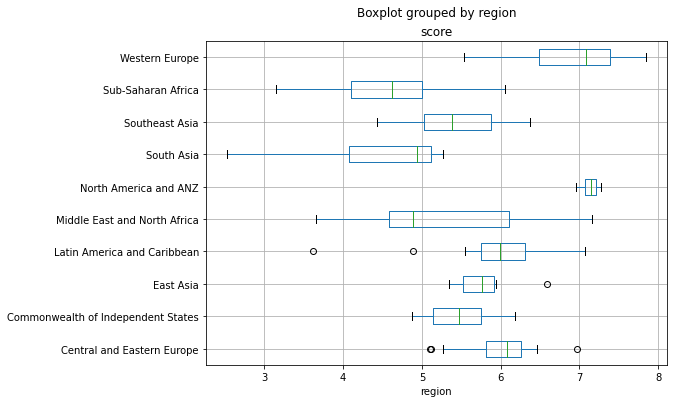

In [14]:
ax=happiness.boxplot(column='score', by='region', figsize=(8, 6), rot=0, vert=False)

The scores for South Asia are more diverse in the lower scores and for Middle East and North Africa are more diverse in the higher scores. 

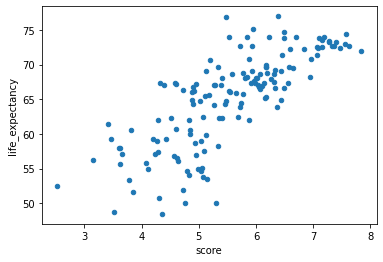

In [15]:
happiness.plot.scatter(x='score', y='life_expectancy');

There is a positive correlation between life expectancy and the happiness score.

In [16]:
happiness.corr()

,score,GDP,social_support,life_expectancy,freedom,generosity,corruption
score,1.000000,0.789760,0.756888,0.768099,0.607753,-0.017799,-0.421140
GDP,0.789760,1.000000,0.785299,0.859461,0.432323,-0.199286,-0.342337
social_support,0.756888,0.785299,1.000000,0.723256,0.482930,-0.114946,-0.203207
life_expectancy,0.768099,0.859461,0.723256,1.000000,0.461494,-0.161750,-0.364374
freedom,0.607753,0.432323,0.482930,0.461494,1.000000,0.169437,-0.401363
generosity,-0.017799,-0.199286,-0.114946,-0.161750,0.169437,1.000000,-0.163962
corruption,-0.421140,-0.342337,-0.203207,-0.364374,-0.401363,-0.163962,1.000000


There is a strong positive correlation of the happiness score with GDP, social support, life expectancy and freedoms. There is negative correlation with corruption and a weak negative correlation with generosity. 

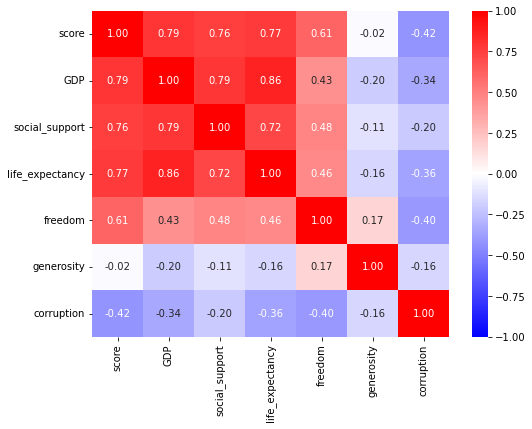

In [17]:
plt.figure(figsize=(8,6))
sns.heatmap(
    happiness.corr(),
    cmap='bwr',
    center=0,
    vmin=-1,
    vmax=1,
    annot=True,
    fmt='.2f'
);

Which county has the maximum score in each region?

In [18]:
hr_by_region_max=happiness.groupby('region').score.max().reset_index().sort_values('score', ascending=False)

In [19]:
hr_by_region_max

,region,score
9,Western Europe,7.842
5,North America and ANZ,7.277
4,Middle East and North Africa,7.157
3,Latin America and Caribbean,7.069
0,Central and Eastern Europe,6.965
2,East Asia,6.584
7,Southeast Asia,6.377
1,Commonwealth of Independent States,6.179
8,Sub-Saharan Africa,6.049
6,South Asia,5.269


In [20]:
hr_by_region_max.merge(happiness, on=['region', 'score'], how='inner').sort_values('score', ascending=False)[['region', 'score', 'country']]

,region,score,country
0,Western Europe,7.842,Finland
1,North America and ANZ,7.277,New Zealand
2,Middle East and North Africa,7.157,Israel
3,Latin America and Caribbean,7.069,Costa Rica
4,Central and Eastern Europe,6.965,Czech Republic
5,East Asia,6.584,Taiwan Province of China
6,Southeast Asia,6.377,Singapore
7,Commonwealth of Independent States,6.179,Uzbekistan
8,Sub-Saharan Africa,6.049,Mauritius
9,South Asia,5.269,Nepal


Finland has the highest score, although the mean happiness score for Western Europe is the second after North America ANZ.

Which country has the minimim score in each region?

In [21]:
hr_by_region_min=happiness.groupby('region').score.min().reset_index().sort_values('score', ascending=False)

In [22]:
hr_by_region_min

,region,score
5,North America and ANZ,6.951
9,Western Europe,5.536
2,East Asia,5.339
0,Central and Eastern Europe,5.101
1,Commonwealth of Independent States,4.875
7,Southeast Asia,4.426
4,Middle East and North Africa,3.658
3,Latin America and Caribbean,3.615
8,Sub-Saharan Africa,3.145
6,South Asia,2.523


In [23]:
hr_by_region_min.merge(happiness, on=['region', 'score'], how='inner').sort_values('score', ascending=False)[['region', 'score', 'country']]

,region,score,country
0,North America and ANZ,6.951,United States
1,Western Europe,5.536,North Cyprus
2,East Asia,5.339,China
3,Central and Eastern Europe,5.101,North Macedonia
4,Commonwealth of Independent States,4.875,Ukraine
5,Southeast Asia,4.426,Myanmar
6,Middle East and North Africa,3.658,Yemen
7,Latin America and Caribbean,3.615,Haiti
8,Sub-Saharan Africa,3.145,Zimbabwe
9,South Asia,2.523,Afghanistan


<h3>Linear regression for the happiness score<h3>

In [24]:
happiness1=happiness.copy()
happiness1 = (
    happiness1
    .select_dtypes(include='number')
)

In [25]:
X = happiness1.drop(columns='score')
y = happiness1.score

In [26]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [27]:
from sklearn.linear_model import LinearRegression

In [28]:
lr=LinearRegression()

In [29]:
lr

LinearRegression()

In [30]:
lr.fit(X_train, y_train)

LinearRegression()

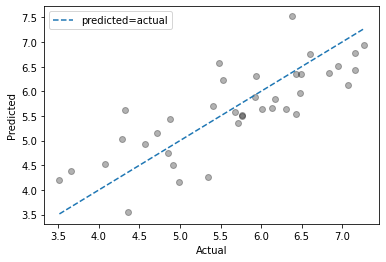

In [31]:
from model_inspector import get_inspector

inspector = get_inspector(lr, X_test, y_test)
ax=inspector.plot_pred_vs_act()

(-3.0, 8.0)

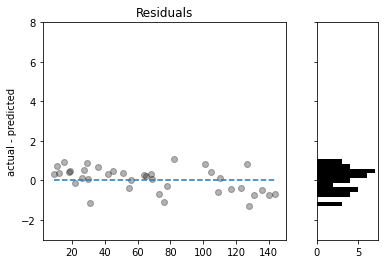

In [32]:
axes = inspector.plot_residuals()
axes[0].set_ylim([-3, 8])

The residual graph shows that the majority of countries have actual happiness score higher than predicted. The histogram of residuals is right-skewed.

In [33]:
y_pred = lr.predict(X_test)
y_pred

array([6.22302657, 6.51113283, 5.14877869, 5.69919971, 6.57928422,
       7.52358695, 5.50436389, 4.38595572, 5.3635949 , 4.2656204 ,
       5.43648182, 6.77581739, 5.64207785, 6.94087514, 6.36647698,
       5.89172884, 4.53342496, 5.58818723, 6.30190712, 5.02864259,
       5.52963612, 4.93371124, 6.34531509, 3.54504031, 5.62808303,
       4.20730972, 4.74463356, 4.16766049, 5.6698182 , 6.34433288,
       6.75194399, 6.1322371 , 5.52881293, 6.44106731, 5.84289413,
       4.49513597, 5.63720158, 5.97269001])

In [34]:
y_train.mean()

5.484837837837837

Compare residuals of the model with dummy model.

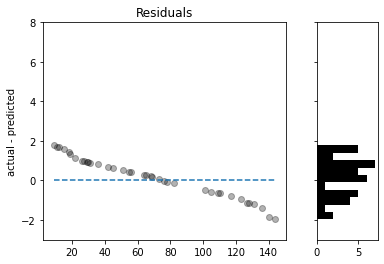

In [35]:
from sklearn.dummy import DummyRegressor

dummy_inspector = get_inspector(DummyRegressor().fit(X_train, y_train), X_test, y_test)
axes = dummy_inspector.plot_residuals()
axes[0].set_ylim([-3, 8]);

In [36]:
null_model = DummyRegressor()
null_model.fit(X_train, y_train)
y_pred_null = null_model.predict(X_test)
y_pred_null

array([5.48483784, 5.48483784, 5.48483784, 5.48483784, 5.48483784,
       5.48483784, 5.48483784, 5.48483784, 5.48483784, 5.48483784,
       5.48483784, 5.48483784, 5.48483784, 5.48483784, 5.48483784,
       5.48483784, 5.48483784, 5.48483784, 5.48483784, 5.48483784,
       5.48483784, 5.48483784, 5.48483784, 5.48483784, 5.48483784,
       5.48483784, 5.48483784, 5.48483784, 5.48483784, 5.48483784,
       5.48483784, 5.48483784, 5.48483784, 5.48483784, 5.48483784,
       5.48483784, 5.48483784, 5.48483784])

In [37]:
lr.score(X_test, y_test)

0.6256221680130927

In [38]:
lr.score(X_train, y_train)

0.7876196829615639

In [39]:
from sklearn import metrics
metrics.mean_squared_error(y_true=y_test, y_pred=y_pred)

0.37764991290551153

In [40]:
metrics.mean_squared_error(y_test, y_pred_null)

1.0441648584445036

In [41]:
metrics.mean_absolute_error(y_test, y_pred_null)

0.867718349928876

The model shows both bias and variance. The model's MSE is better than the one of the dummy model.

In [42]:
inspector.show_model()

Intercept is at -1.82.
It adds 0.29 to the score for every additional point of GDP, adds 2.76 to every additional point in social support
adds 0.03 for every additional point in life-expectance,
adds 1.57 for every additional point in freedom of choice,
adds 0.49 for every additional points in generocity, and
subtracts 0.92 for every additional points in corruption. 

C:\Users\ikhor\anaconda3\lib\site-packages\waterfall_chart.py:66: FutureWarning: Behavior when concatenating bool-dtype and numeric-dtype arrays is deprecated; in a future version these will cast to object dtype (instead of coercing bools to numeric values). To retain the old behavior, explicitly cast bool-dtype arrays to numeric dtype.
  trans.loc[net_label]= total


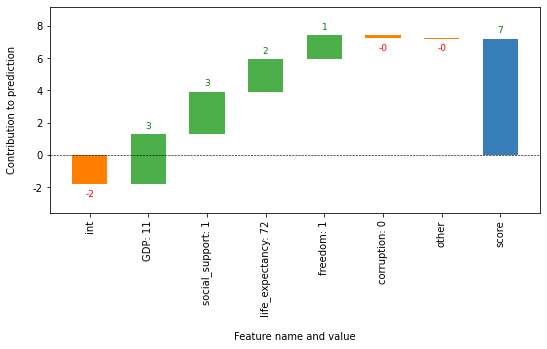

In [43]:
ax = inspector.plot_waterfall(
    X.iloc[0],
    bar_num_formatter='.0f',
    tick_num_formatter='.0f',
    sorted_value=False,
    rotation_value=90,
    threshold=0.02,
)

ax.get_figure().set_size_inches((8, 6))

In the CIS region, Ukbekistan has the highest happiness score although the country faces some political and ecnomic difficilties. This shows the CIS region only countries. 

In [44]:
hp_cis=happiness[happiness['region'] == 'Commonwealth of Independent States']
hp_cis

,country,region,score,GDP,social_support,life_expectancy,freedom,generosity,corruption
41,Uzbekistan,Commonwealth of Independent States,6.179,8.836,0.918,65.255,0.970,0.311,0.515
44,Kazakhstan,Commonwealth of Independent States,6.152,10.155,0.952,65.200,0.853,-0.069,0.733
64,Moldova,Commonwealth of Independent States,5.766,9.454,0.857,65.699,0.822,-0.079,0.918
66,Kyrgyzstan,Commonwealth of Independent States,5.744,8.538,0.893,64.401,0.935,0.119,0.908
74,Belarus,Commonwealth of Independent States,5.534,9.853,0.910,66.253,0.650,-0.180,0.627
75,Russia,Commonwealth of Independent States,5.477,10.189,0.903,64.703,0.718,-0.111,0.845
77,Tajikistan,Commonwealth of Independent States,5.466,8.091,0.860,64.281,0.832,-0.056,0.553
85,Armenia,Commonwealth of Independent States,5.283,9.487,0.799,67.055,0.825,-0.168,0.629
89,Azerbaijan,Commonwealth of Independent States,5.171,9.569,0.836,65.656,0.814,-0.223,0.506
96,Turkmenistan,Commonwealth of Independent States,5.066,9.629,0.983,62.409,0.877,0.273,0.888


In [45]:
hp_cis.corr()

,score,GDP,social_support,life_expectancy,freedom,generosity,corruption
score,1.000000,-0.117230,0.457719,0.243719,0.471475,0.344116,-0.127851
GDP,-0.117230,1.000000,0.089004,0.174224,-0.529826,-0.370858,0.211391
social_support,0.457719,0.089004,1.000000,-0.261527,0.177885,0.629364,0.303989
life_expectancy,0.243719,0.174224,-0.261527,1.000000,-0.275122,-0.531380,-0.377014
freedom,0.471475,-0.529826,0.177885,-0.275122,1.000000,0.684003,-0.084636
generosity,0.344116,-0.370858,0.629364,-0.531380,0.684003,1.000000,0.239317
corruption,-0.127851,0.211391,0.303989,-0.377014,-0.084636,0.239317,1.000000


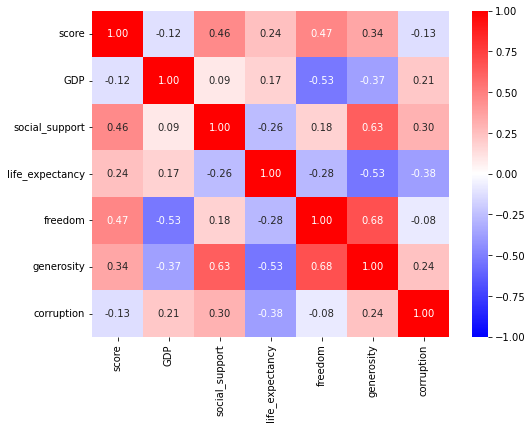

In [46]:
plt.figure(figsize=(8,6))
sns.heatmap(
    hp_cis.corr(),
    cmap='bwr',
    center=0,
    vmin=-1,
    vmax=1,
    annot=True,
    fmt='.2f'
);

For CIS countries, the correlations of the happiness score with other determinants are much weaker than for all world countries. The stronger correlation of the happiness score is with social support and freedom to make choices. 

<h3>Analysis of the 25% of countries with the highest score. Logistic Regression</h3>
<h4> A new column for 25% top happy countries</h4>

In [47]:
happiness.describe()

,score,GDP,social_support,life_expectancy,freedom,generosity,corruption
count,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000
mean,5.532839,9.432208,0.814745,64.992799,0.791597,-0.015134,0.727450
std,1.073924,1.158601,0.114889,6.762043,0.113332,0.150657,0.179226
min,2.523000,6.635000,0.463000,48.478000,0.382000,-0.288000,0.082000
25%,4.852000,8.541000,0.750000,59.802000,0.718000,-0.126000,0.667000
50%,5.534000,9.569000,0.832000,66.603000,0.804000,-0.036000,0.781000
75%,6.255000,10.421000,0.905000,69.600000,0.877000,0.079000,0.845000
max,7.842000,11.647000,0.983000,76.953000,0.970000,0.542000,0.939000


In [48]:
hp_upper=happiness[happiness['score']>=6.255]

In [49]:
hp_upper.head()

,country,region,score,GDP,social_support,life_expectancy,freedom,generosity,corruption
0,Finland,Western Europe,7.842,10.775,0.954,72.0,0.949,-0.098,0.186
1,Denmark,Western Europe,7.620,10.933,0.954,72.7,0.946,0.030,0.179
2,Switzerland,Western Europe,7.571,11.117,0.942,74.4,0.919,0.025,0.292
3,Iceland,Western Europe,7.554,10.878,0.983,73.0,0.955,0.160,0.673
4,Netherlands,Western Europe,7.464,10.932,0.942,72.4,0.913,0.175,0.338


Creating a column score_log for logistic regression for countries with score higher or equal to 6.255 (1) and lower than 6.255 (0)

In [50]:
happiness['score_log'] = pd.cut(x=happiness['score'], bins=[0, 6.255, 8],
                     labels=[0, 1
                            ])

In [51]:
happiness

,country,region,score,GDP,social_support,life_expectancy,freedom,generosity,corruption,score_log
0,Finland,Western Europe,7.842,10.775,0.954,72.000,0.949,-0.098,0.186,1
1,Denmark,Western Europe,7.620,10.933,0.954,72.700,0.946,0.030,0.179,1
2,Switzerland,Western Europe,7.571,11.117,0.942,74.400,0.919,0.025,0.292,1
3,Iceland,Western Europe,7.554,10.878,0.983,73.000,0.955,0.160,0.673,1
4,Netherlands,Western Europe,7.464,10.932,0.942,72.400,0.913,0.175,0.338,1
...,...,...,...,...,...,...,...,...,...,...
144,Lesotho,Sub-Saharan Africa,3.512,7.926,0.787,48.700,0.715,-0.131,0.915,0
145,Botswana,Sub-Saharan Africa,3.467,9.782,0.784,59.269,0.824,-0.246,0.801,0
146,Rwanda,Sub-Saharan Africa,3.415,7.676,0.552,61.400,0.897,0.061,0.167,0
147,Zimbabwe,Sub-Saharan Africa,3.145,7.943,0.750,56.201,0.677,-0.047,0.821,0


In [52]:
X=happiness.drop(columns=["score", "score_log", 'country', 'region'])
y=happiness.score_log

In [53]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [54]:
from sklearn.linear_model import LogisticRegression

lr=LogisticRegression()

lr.fit(X_train, y_train)

LogisticRegression()

In [55]:
lr.score(X_test, y_test)

0.8157894736842105

In [56]:
lr.score(X_train, y_train)

0.918918918918919

In [57]:
from sklearn.dummy import DummyClassifier

null_model = DummyClassifier()
null_model.fit(X_train, y_train)

DummyClassifier()

In [58]:
null_model.score(X_test, y_test)

0.6578947368421053

In [59]:
y_test.value_counts(normalize=True)

0    0.657895
1    0.342105
Name: score_log, dtype: float64

In [60]:
y_train.value_counts(normalize=True)

0    0.783784
1    0.216216
Name: score_log, dtype: float64

The model is lower in bias and in variance and is better than the dummy model in predicting the score. 

In [61]:
from model_inspector import get_inspector

inspector = get_inspector(lr, X, y)
inspector.show_model()

C:\Users\ikhor\anaconda3\lib\site-packages\waterfall_chart.py:66: FutureWarning: Behavior when concatenating bool-dtype and numeric-dtype arrays is deprecated; in a future version these will cast to object dtype (instead of coercing bools to numeric values). To retain the old behavior, explicitly cast bool-dtype arrays to numeric dtype.
  trans.loc[net_label]= total
C:\Users\ikhor\anaconda3\lib\site-packages\waterfall_chart.py:66: FutureWarning: Behavior when concatenating bool-dtype and numeric-dtype arrays is deprecated; in a future version these will cast to object dtype (instead of coercing bools to numeric values). To retain the old behavior, explicitly cast bool-dtype arrays to numeric dtype.
  trans.loc[net_label]= total
C:\Users\ikhor\anaconda3\lib\site-packages\waterfall_chart.py:66: FutureWarning: Behavior when concatenating bool-dtype and numeric-dtype arrays is deprecated; in a future version these will cast to object dtype (instead of coercing bools to numeric values). To 

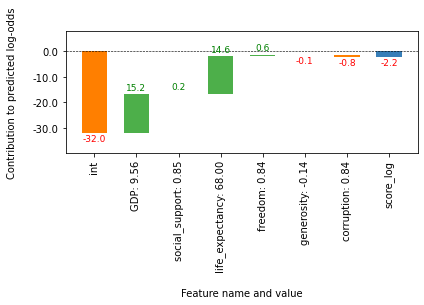

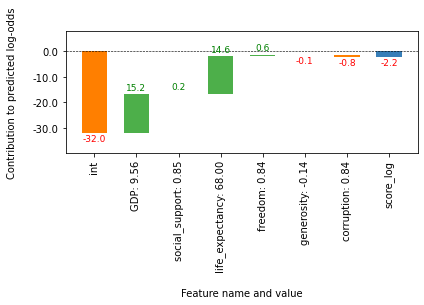

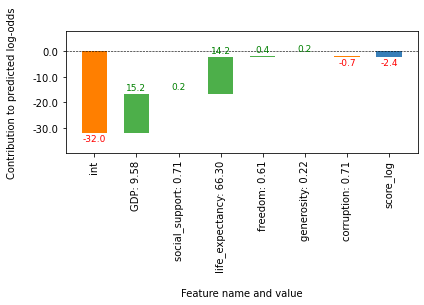

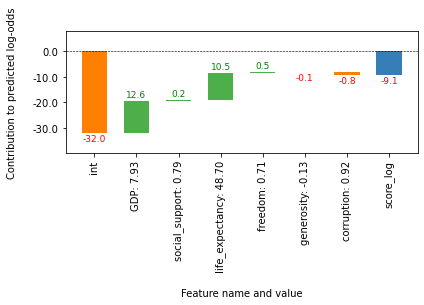

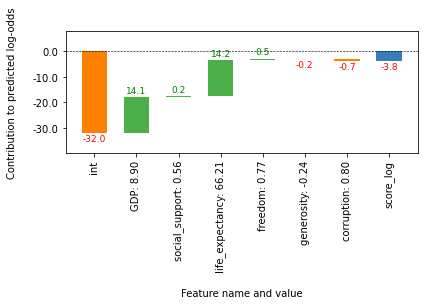

In [62]:
for _ in range(5):
    ax=inspector.plot_waterfall(
    X_test.sample(1).iloc[-1], sorted_value=False, threshold=None, rotation_value=90
    )

The graphs show that GDP and healthy life expectancy are the highest contributors to happiness. 

In [63]:
inspector.confusion_matrix()

,Predicted 0,Predicted 1,Totals
Actual 0,106,6,112
Actual 1,10,27,37
Totals,116,33,149


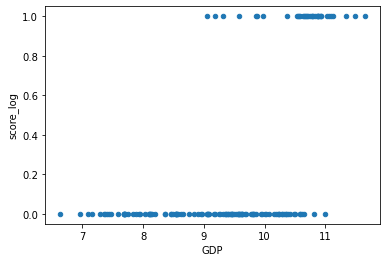

In [64]:
ax=happiness.plot.scatter(x='GDP', y='score_log')

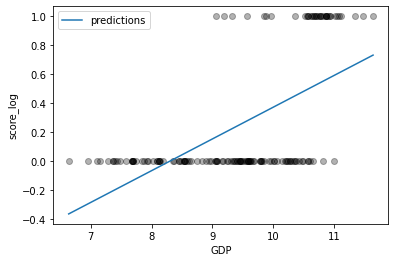

In [65]:
from sklearn.linear_model import LinearRegression

X = happiness[["GDP"]]
y = happiness.score_log

ax = get_inspector(LinearRegression().fit(X, y), X, y).plot()

C:\Users\ikhor\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


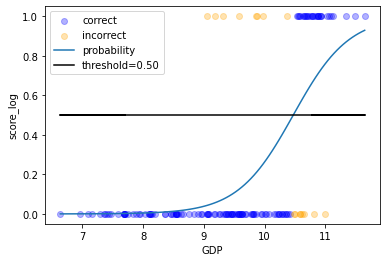

In [66]:
logreg=LogisticRegression()
logreg.fit(X, y)
ax=get_inspector(logreg, X, y).plot()

In [67]:
logreg.predict_proba(X.head())

array([[0.33965061, 0.66034939],
       [0.26696927, 0.73303073],
       [0.19590902, 0.80409098],
       [0.29113281, 0.70886719],
       [0.26739705, 0.73260295]])

In [68]:
pd.concat(
    (
        pd.DataFrame(logreg.predict_proba(X), columns=y.unique(), index=y.index),
        pd.DataFrame(logreg.predict(X), columns=["pred"], index=y.index),
    ),
    axis="columns",
).sample(30)

,1,0,pred
51,0.880405,0.119595,0
147,0.996020,0.003980,0
24,0.207157,0.792843,1
82,0.994190,0.005810,0
71,0.761238,0.238762,0
23,0.294299,0.705701,1
142,0.998559,0.001441,0
39,0.494372,0.505628,1
72,0.811683,0.188317,0
32,0.925424,0.074576,0


C:\Users\ikhor\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


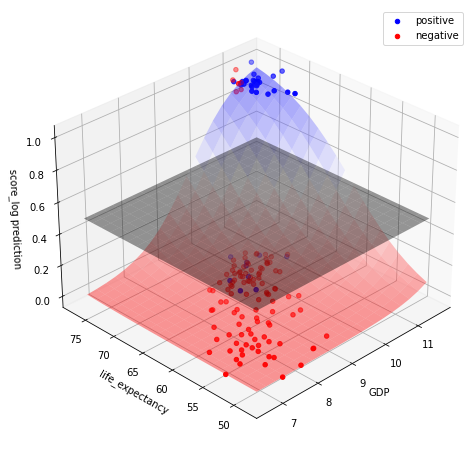

In [69]:
X = happiness[["GDP", "life_expectancy"]]
inspector = get_inspector(LogisticRegression().fit(X, y), X, y)
ax = inspector.plot3d()
ax.view_init(elev=30.0, azim=225)

C:\Users\ikhor\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


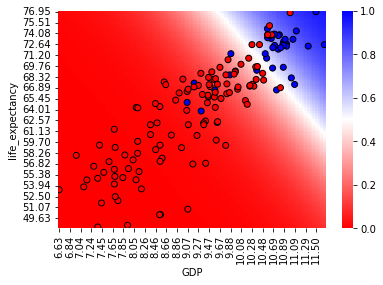

In [70]:
ax = inspector.plot()

In [71]:
inspector.show_model()

C:\Users\ikhor\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


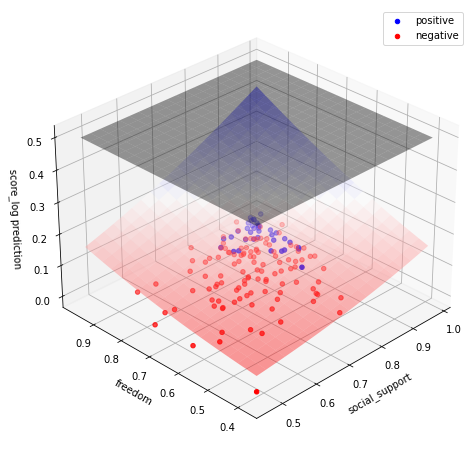

In [72]:
X = happiness[["social_support", "freedom"]]
inspector = get_inspector(LogisticRegression().fit(X, y), X, y)
ax = inspector.plot3d()
ax.view_init(elev=30.0, azim=225)

C:\Users\ikhor\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


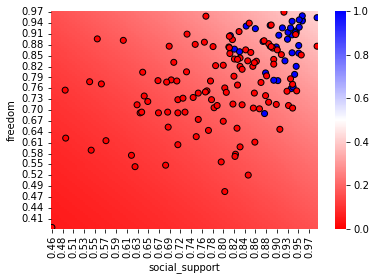

In [73]:
ax=inspector.plot()

It seems that social support and freedom are not influencing happiness score.  

C:\Users\ikhor\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


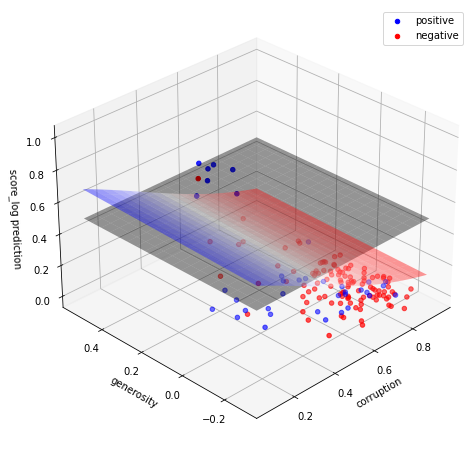

In [74]:
X = happiness[["corruption", "generosity"]]
inspector = get_inspector(LogisticRegression().fit(X, y), X, y)
ax = inspector.plot3d()
ax.view_init(elev=30.0, azim=225)

C:\Users\ikhor\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


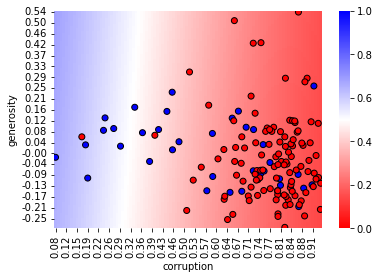

In [75]:
ax=inspector.plot()

In [76]:
inspector.show_model()

It seems that corruption and generocity influnce happiness score but this graphs shows many false positives (blue dots in the red area) that have higher levels of corruption but have higher happiness score.

C:\Users\ikhor\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


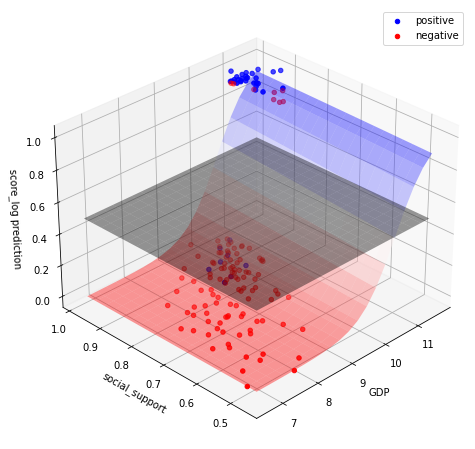

In [77]:
X = happiness[["GDP", "social_support"]]
inspector = get_inspector(LogisticRegression().fit(X, y), X, y)
ax = inspector.plot3d()
ax.view_init(elev=30.0, azim=225)

C:\Users\ikhor\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


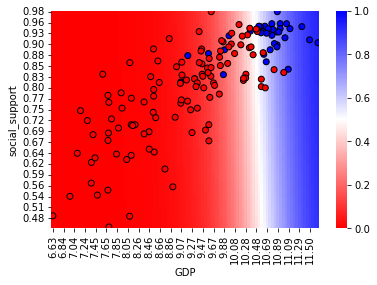

In [78]:
ax=inspector.plot()

<h4>Summary: GDP and healthy life expectancy are strng features and better influencers of happiness with much fewer false positives (countreis with lower GDP but higher score).<h4>

In [79]:
lr.predict(X_test)

array([1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1], dtype=int64)

<h3>Decision tree for the model.<h3>

In [80]:
from sklearn.tree  import DecisionTreeClassifier

In [81]:
hap_tree=happiness.copy()
hap_tree.head()

,country,region,score,GDP,social_support,life_expectancy,freedom,generosity,corruption,score_log
0,Finland,Western Europe,7.842,10.775,0.954,72.0,0.949,-0.098,0.186,1
1,Denmark,Western Europe,7.620,10.933,0.954,72.7,0.946,0.030,0.179,1
2,Switzerland,Western Europe,7.571,11.117,0.942,74.4,0.919,0.025,0.292,1
3,Iceland,Western Europe,7.554,10.878,0.983,73.0,0.955,0.160,0.673,1
4,Netherlands,Western Europe,7.464,10.932,0.942,72.4,0.913,0.175,0.338,1


In [82]:
X = hap_tree[['GDP', 'social_support', 'life_expectancy', 'freedom', 'generosity', 'corruption']]
y = hap_tree.score_log

In [83]:
X.head()

,GDP,social_support,life_expectancy,freedom,generosity,corruption
0,10.775,0.954,72.0,0.949,-0.098,0.186
1,10.933,0.954,72.7,0.946,0.030,0.179
2,11.117,0.942,74.4,0.919,0.025,0.292
3,10.878,0.983,73.0,0.955,0.160,0.673
4,10.932,0.942,72.4,0.913,0.175,0.338


In [84]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [85]:
dtc = DecisionTreeClassifier(random_state=42)
dtc.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [86]:
dtc.score(X_train, y_train)


1.0

In [87]:
dtc.score(X_test, y_test)

0.8157894736842105

The model shows no bias and very small variance. 

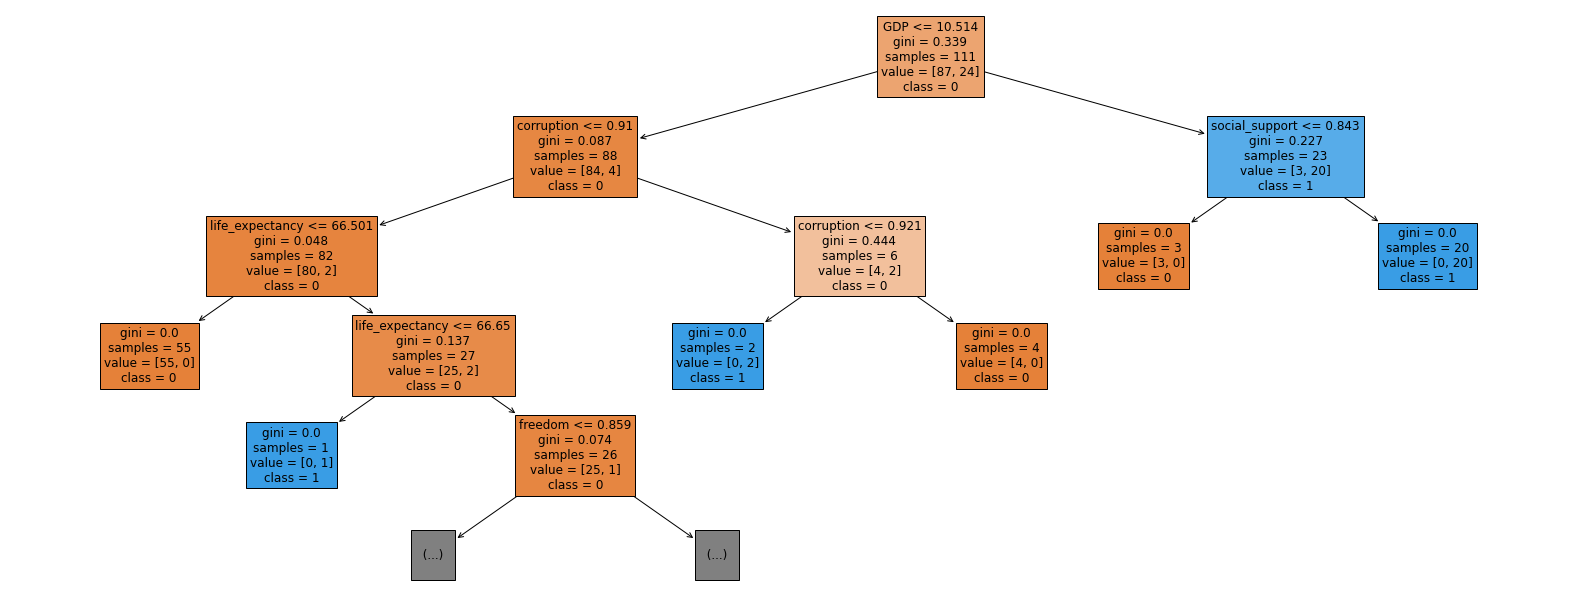

In [88]:
inspector = get_inspector(dtc, X, y)
ax = inspector.show_model(max_depth=4)

 <h4>Summary</h4>

* A country's <u>GDP</u> influences the most whether the country is in the group of 25% happiest countries or not.

* For 23 countries with GDP of more than <u>$10,514</u>, social support is the most important determinant of happiness, and then generocity and voluntarism becomes the next important determinant.

* For 88 countries with GDP less than $10,514, corruption and then health (life_expectancy) are the most important determinants of happiness. In this group of countries, with higher level of freedom, life_expectancy again becomes important.

<h3>Random Forest Classification<h3>

In [89]:
X = hap_tree[['GDP', 'social_support', 'life_expectancy', 'freedom', 'generosity', 'corruption']]
y = hap_tree.score_log

In [90]:
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [91]:
rfc = RandomForestClassifier(n_estimators=20, n_jobs=-1, random_state=42)

In [92]:
rfc.fit(X_train, y_train)

RandomForestClassifier(n_estimators=20, n_jobs=-1, random_state=42)

In [93]:
rfc.score(X_train, y_train)

1.0

In [94]:
rfc.score(X_test, y_test)

0.7894736842105263

In [95]:
rfc.estimators_

[DecisionTreeClassifier(max_features='auto', random_state=1608637542),
 DecisionTreeClassifier(max_features='auto', random_state=1273642419),
 DecisionTreeClassifier(max_features='auto', random_state=1935803228),
 DecisionTreeClassifier(max_features='auto', random_state=787846414),
 DecisionTreeClassifier(max_features='auto', random_state=996406378),
 DecisionTreeClassifier(max_features='auto', random_state=1201263687),
 DecisionTreeClassifier(max_features='auto', random_state=423734972),
 DecisionTreeClassifier(max_features='auto', random_state=415968276),
 DecisionTreeClassifier(max_features='auto', random_state=670094950),
 DecisionTreeClassifier(max_features='auto', random_state=1914837113),
 DecisionTreeClassifier(max_features='auto', random_state=669991378),
 DecisionTreeClassifier(max_features='auto', random_state=429389014),
 DecisionTreeClassifier(max_features='auto', random_state=249467210),
 DecisionTreeClassifier(max_features='auto', random_state=1972458954),
 DecisionTreeC

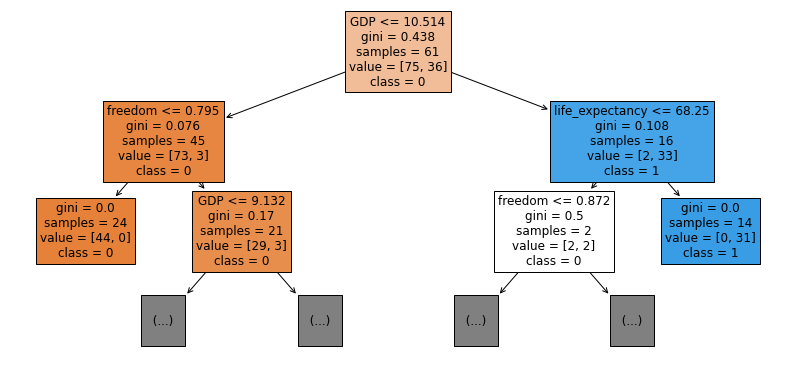

In [96]:
from model_inspector import get_inspector

inspector = get_inspector(rfc.estimators_[4], X, y)
ax = inspector.show_model(max_depth=2)

In [97]:
pd.DataFrame(rfc.feature_importances_, X_train.columns).sort_values(by=0, ascending=False)

,0
GDP,0.372587
life_expectancy,0.219716
freedom,0.133298
social_support,0.131724
corruption,0.114544
generosity,0.028130


In [98]:
inspector.confusion_matrix()

C:\Users\ikhor\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


,Predicted 0,Predicted 1,Totals
Actual 0,104,8,112
Actual 1,6,31,37
Totals,110,39,149


In [99]:
from sklearn.model_selection import GridSearchCV, KFold

In [100]:
grid = GridSearchCV(
    estimator=RandomForestClassifier(n_jobs=-1, random_state=1),
    param_grid={'n_estimators': [20, 50, 100], 
                'max_features': [1.0, 0.5, 0.3], 
                'criterion' : ["gini", "entropy"],
                'min_samples_leaf':[1, 3, 5],
                'max_depth':[3, 5, 10]},
    cv=KFold(5, shuffle=True, random_state=1),
    return_train_score=True
)
grid.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=1, shuffle=True),
             estimator=RandomForestClassifier(n_jobs=-1, random_state=1),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 10],
                         'max_features': [1.0, 0.5, 0.3],
                         'min_samples_leaf': [1, 3, 5],
                         'n_estimators': [20, 50, 100]},
             return_train_score=True)

In [101]:
grid.best_score_, grid.best_params_

(0.9458498023715414,
 {'criterion': 'gini',
  'max_depth': 3,
  'max_features': 1.0,
  'min_samples_leaf': 1,
  'n_estimators': 50})

In [102]:
y_pred=grid.predict(X_test)


In [103]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.868421052631579

In [104]:
y_test.value_counts(normalize=True)

0    0.657895
1    0.342105
Name: score_log, dtype: float64

In [105]:
rfc = RandomForestClassifier(n_estimators=50, max_depth=3, max_features=1, min_samples_leaf=1, n_jobs=-1, random_state=42)

In [106]:
rfc.fit(X_train, y_train)

RandomForestClassifier(max_depth=3, max_features=1, n_estimators=50, n_jobs=-1,
                       random_state=42)

In [107]:
rfc.score(X_train, y_train)

0.963963963963964

In [108]:
rfc.score(X_test, y_test)

0.8157894736842105

The Random Forest Classifier improves accuracy scores with 50 trees improves accuracy from .78 to .81. 

In [109]:
pd.DataFrame(rfc.feature_importances_, X_train.columns).sort_values(by=0, ascending=False)

,0
GDP,0.252709
life_expectancy,0.228811
social_support,0.171486
corruption,0.142438
freedom,0.135138
generosity,0.069418


With the new random forest classification, GDP is less important but still the most importan feature, social support and corruption become more important and freedom looses its importance a little. 

In [111]:
hp_kaz=happiness.query("country=='Kazakhstan'")
hp_kaz

,country,region,score,GDP,social_support,life_expectancy,freedom,generosity,corruption,score_log
44,Kazakhstan,Commonwealth of Independent States,6.152,10.155,0.952,65.2,0.853,-0.069,0.733,0


In [113]:
rfc.predict(hp_kaz[['GDP', 'social_support', 'life_expectancy', 'freedom', 'generosity', 'corruption']])

array([0], dtype=int64)

In [139]:
rfc.predict([[10155, 0.952, 65.2, 0.853, -0.069, 0.733]])

C:\Users\ikhor\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

In [140]:
rfc.predict([[10155, 0.952, 66.4, 0.853, -0.069, 0.733]])

C:\Users\ikhor\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

In [144]:
rfc.predict([[10155, 0.952, 65.2, 0.853, -0.069, 0.729]])

C:\Users\ikhor\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

Kazakhstan can reach the 25% happiest countries in case it increases heathy life expecancy to 65.2 or decreases corruption by .004